In [12]:
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns

In [13]:
bank_data = pd.read_csv('dataset/bank_data_processed.csv')

bank_data.sample(10)

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
474,44,142,1,3,0,0,0,0,0
189,34,178,1,3,0,0,0,0,0
450,35,180,1,3,571,0,1,1,1
247,39,138,1,2,0,0,0,1,0
430,65,170,4,2,0,0,1,1,1
155,59,102,4,2,115,0,0,1,0
70,26,172,2,2,0,0,0,1,0
239,43,201,1,2,0,0,0,0,1
264,59,114,3,2,0,0,0,1,0
131,56,164,4,2,234,0,1,1,1


In [14]:
x = bank_data.drop('CreditCard', axis = 1)

y = bank_data['CreditCard']

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rnd_clf = RandomForestClassifier(n_estimators = 400, max_leaf_nodes =16, n_jobs = -1)

rnd_clf.fit(x_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=400, n_jobs=-1)

In [18]:
y_pred = rnd_clf.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8229166666666666

In [20]:
important_features = pd.Series(rnd_clf.feature_importances_, index = x.columns,).sort_values(ascending = False)

important_features

CD Account            0.442597
Income                0.138907
Age                   0.137641
Mortgage              0.079533
Securities Account    0.068310
Online                0.060942
Family                0.038960
Education             0.033110
dtype: float64

Text(0.5, 1.0, 'Important Features')

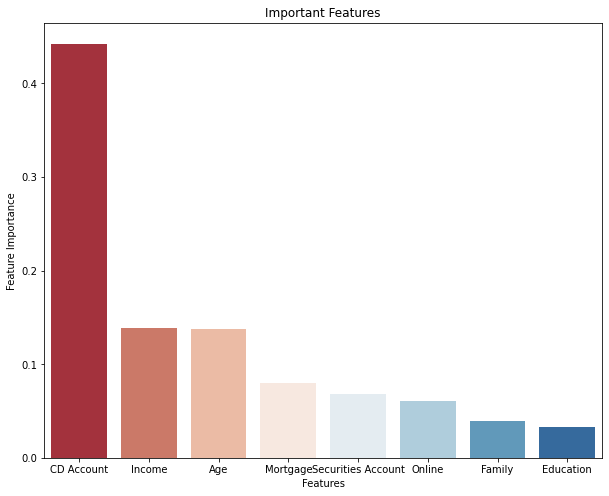

In [22]:
fig, ax = plt.subplots(figsize = (10, 8 ))

sns.barplot(x = important_features.index, y = important_features, palette = 'RdBu')

plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Important Features')